In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd
import csv
import numpy as np
from datetime import datetime

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

social_media_path = "OSF_socialmedia_data1.csv"
social_media = pd.read_csv(social_media_path)
social_media.rename(columns = {"Unnamed: 0": "Row"}, inplace = True)
social_media.set_index("Row", inplace=True)
#social_media["LunarPhase"] = ""
social_media.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,LunarPhase,LunarPhaseDay
Row,,,,,,,,,,,,,,,,,,,,,
1,115091,5/2/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,0.187258,6
2,115091,5/2/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,0.187258,6
3,115091,5/2/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,0.187258,6
4,115091,5/2/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,0.187258,6
5,115091,5/2/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187258,6


In [50]:
social_media_pd = pd.DataFrame(social_media)
social_media_pd.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,LunarPhase,LunarPhaseDay
Row,,,,,,,,,,,,,,,,,,,,,
1,115091,5/2/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,0.187258,6
2,115091,5/2/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,0.187258,6
3,115091,5/2/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,0.187258,6
4,115091,5/2/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,0.187258,6
5,115091,5/2/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187258,6


In [51]:
social_media_pd = social_media_pd.fillna(0)

In [52]:
social_media_pd.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,LunarPhase,LunarPhaseDay
Row,,,,,,,,,,,,,,,,,,,,,
1,115091,5/2/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,0.187258,6
2,115091,5/2/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,0.187258,6
3,115091,5/2/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,0.187258,6
4,115091,5/2/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,0.187258,6
5,115091,5/2/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.187258,6


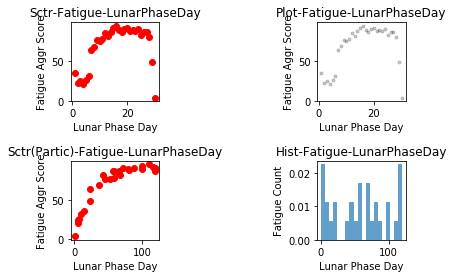

In [99]:
lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
x_values = lunar_phase_day.index
partic = lunar_phase_day["Participant"]

lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()
y_values = lunar_phase_day["Fatigue"]

#---
plt.subplot(2,3,1)
plt.scatter(x_values, y_values, facecolors="red")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Sctr-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,3)
plt.plot(x_values, y_values, 'ok', markersize=3, alpha=0.2)
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Plot-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,4)
plt.scatter(partic, y_values, facecolors="red")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Sctr(Partic)-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,6)
plt.hist(partic, 20, density=True, alpha=0.7, label="Fatigue")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Hist-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Count")

plt.show()

In [23]:
lunar_phase_day_01 = social_media_pd[social_media_pd["LunarPhaseDay"] == 1]
lunar_phase_day_08 = social_media_pd[social_media_pd["LunarPhaseDay"] == 8]
lunar_phase_day_15 = social_media_pd[social_media_pd["LunarPhaseDay"] == 15]
lunar_phase_day_22 = social_media_pd[social_media_pd["LunarPhaseDay"] == 22]
print(lunar_phase_day_22.Fatigue.mean())
print(lunar_phase_day_22.DeprMood.mean())
print(lunar_phase_day_22.Loneliness.mean())
print(lunar_phase_day_22.Concentrat.mean())
print(lunar_phase_day_22.LossOfInt.mean())
print(lunar_phase_day_22.Inferior.mean())
print(lunar_phase_day_22.Hopeless.mean())
print(lunar_phase_day_22.Stress.mean())

25.08239095315024
9.321486268174475
8.526655896607432
20.029079159935378
17.901453957996768
7.7124394184168015
9.332794830371567
14.222940226171245


In [24]:
stats.ttest_ind(lunar_phase_day_01.Fatigue, lunar_phase_day_15.Fatigue, equal_var=False)

Ttest_indResult(statistic=0.8356649655465981, pvalue=0.4050562145692801)

In [25]:
stats.ttest_ind(lunar_phase_day_01.DeprMood, lunar_phase_day_15.DeprMood, equal_var=False)

Ttest_indResult(statistic=1.9586640645627609, pvalue=0.05255559430070138)

In [26]:
stats.ttest_ind(lunar_phase_day_01.Loneliness, lunar_phase_day_15.Loneliness, equal_var=False)

Ttest_indResult(statistic=2.200110091157067, pvalue=0.029885839002106188)

In [27]:
stats.ttest_ind(lunar_phase_day_01.Concentrat, lunar_phase_day_15.Concentrat, equal_var=False)

Ttest_indResult(statistic=0.15173730599138036, pvalue=0.8796438000442692)

In [28]:
stats.ttest_ind(lunar_phase_day_01.LossOfInt, lunar_phase_day_15.LossOfInt, equal_var=False)

Ttest_indResult(statistic=0.05548636856738438, pvalue=0.9558393343965322)

In [29]:
stats.ttest_ind(lunar_phase_day_01.Inferior, lunar_phase_day_15.Inferior, equal_var=False)

Ttest_indResult(statistic=2.9894220531082896, pvalue=0.0034582088676145704)

In [30]:
stats.ttest_ind(lunar_phase_day_01.Hopeless, lunar_phase_day_15.Hopeless, equal_var=False)

Ttest_indResult(statistic=1.906743684080073, pvalue=0.05903603769169409)

In [31]:
stats.ttest_ind(lunar_phase_day_01.Stress, lunar_phase_day_15.Stress, equal_var=False)

Ttest_indResult(statistic=2.194046482199445, pvalue=0.03029004208496939)

In [ ]:
#The lunar phase cycle is 29.5 days
#The Moon takes 27.3 days to orbit Earth, but the lunar phase cycle (from new Moon to new Moon) is 29.5 days. The Moon spends the extra 2.2 days "catching up" because Earth travels about 45 million miles around the Sun during the time the Moon completes one orbit around Earth.
#https://www.google.com/search?q=number+of+days+in+a+moon+cycle&rlz=1C1CHBD_enUS900US900&oq=number+of+days+in+a+moon+cycle&aqs=chrome..69i57j0l4.7648j0j8&sourceid=chrome&ie=UTF-8

In [ ]:
#with open(social_media_path) as csvfile:
#    csvreader = csv.reader(csvfile, delimiter=",")
#    for row in csvreader:
#        sm_date = row[2]
#        print(sm_date)

In [ ]:
#social_media_pd = social_media
#a = social_media_pd["Date"]
#year = [datetime.strptime(date, '%m/%d/%Y').year for date in a]
#month = [datetime.strptime(date, '%m/%d/%Y').month for date in a]
#day = [datetime.strptime(date, '%m/%d/%Y').day for date in a]
#social_media_pd

In [ ]:
#import datetime
#import ephem
#from datetime import datetime

#with open(social_media_path) as csvfile:
#    csvreader = csv.reader(csvfile, delimiter=",")
#    for row in csvreader:
        
#        year = datetime.strptime(Date, '%m/%d/%Y').year
#        month = datetime.strptime(date, '%m/%d/%Y').month
#        day = datetime.strptime(date, '%m/%d/%Y').day
                                  
#        #date = row[2]
#        #print(sm_date)

#        date=ephem.Date(datetime.date(year,month,day))

#        nnm = ephem.next_new_moon    (date)
#        pnm = ephem.previous_new_moon(date)

#        lunation=(date-pnm)/(nnm-pnm)
        
#        social_media_pd.append({"LunarPhase": lunation})

In [ ]:
###Source Num (01)###
#https://stackoverflow.com/questions/2526815/moon-lunar-phase-algorithm   Aug 23 '15 at 17:24  Victor Rendina

###Notes###
#Added in the following lines
#year = int(input("a year"))
#month = int(input("a month"))
#day = int(input("a day"))
#then altered FROM
#print get_phase_on_day(2013,1,1)
#print get_moons_in_year(2013)
#TO
#print(get_phase_on_day(year, month, day))
#print(get_moons_in_year(2013))

#-###Code###

#-#!/usr/bin/python
#-import datetime
#-import ephem

#-def get_phase_on_day(year,month,day):
#-  """Returns a floating-point number from 0-1. where 0=new, 0.5=full, 1=new"""
#-  #Ephem stores its date numbers as floating points, which the following uses
#-  #to conveniently extract the percent time between one new moon and the next
#-  #This corresponds (somewhat roughly) to the phase of the moon.

#-  #Use Year, Month, Day as arguments
#-  date=ephem.Date(datetime.date(year,month,day))

#-  nnm = ephem.next_new_moon    (date)
#-  pnm = ephem.previous_new_moon(date)

#-  lunation=(date-pnm)/(nnm-pnm)

#-  #Note that there is a ephem.Moon().phase() command, but this returns the
#-  #percentage of the moon which is illuminated. This is not really what we want.

#-  return lunation

#-def get_moons_in_year(year):
#-  """Returns a list of the full and new moons in a year. The list contains tuples
#-of either the form (DATE,'full') or the form (DATE,'new')"""
#-  moons=[]
    
#-  date=ephem.Date(datetime.date(year,1,1))
#-  while date.datetime().year==year:
#-    date=ephem.next_full_moon(date)
#-    moons.append( (date,'full') )

#-  date=ephem.Date(datetime.date(year,1,1))
#-  while date.datetime().year==year:
#-    date=ephem.next_new_moon(date)
#-    moons.append( (date,'new') )

#-  #Note that previous_first_quarter_moon() and previous_last_quarter_moon()
#-  #are also methods

#-  moons.sort(key=lambda x: x[0])

#-  return moons

#-year = int(input("a year"))
#-month = int(input("a month"))
#-day = int(input("a day"))

#-print(get_phase_on_day(year, month, day))

#-print(get_moons_in_year(2013))